In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn import metrics 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
pd.set_option('display.float_format', '{:.2f}'.format)
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import RandomForestRegressor


In [2]:
d=df = pd.read_excel("reg.xlsx")

In [3]:
d

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2068000270,20140805T000000,1400000,5,3.00,3850,14990,1.00,0,0,...,9,2290,1560,1964,0,98004,47.64,-122.22,3010,15001
1,7732500700,20141126T000000,832500,4,2.50,3450,35100,2.00,0,0,...,10,3450,0,1987,0,98052,47.73,-122.11,3110,35894
2,7851990240,20140717T000000,771150,4,3.50,3950,12320,2.00,0,0,...,10,3950,0,2001,0,98065,47.54,-121.87,3920,11086
3,3423049269,20140513T000000,225000,4,1.50,1950,12559,1.50,0,0,...,6,1950,0,1939,0,98188,47.44,-122.28,1950,9178
4,7852150200,20140923T000000,389950,3,2.50,1700,6396,2.00,0,0,...,7,1700,0,2003,0,98065,47.53,-121.87,1700,4444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,774100355,20141103T000000,370000,2,2.00,2100,58488,2.00,0,0,...,9,2100,0,2005,0,98014,47.72,-121.40,1440,59346
1997,2781280150,20140801T000000,190000,2,2.50,1100,1737,2.00,0,0,...,8,1100,0,2006,0,98055,47.45,-122.19,1610,2563
1998,7338000150,20150129T000000,160000,2,1.00,1070,4200,1.00,0,0,...,6,1070,0,1983,0,98002,47.33,-122.22,1150,4200
1999,6977000040,20140823T000000,625000,4,3.00,2190,12825,1.00,0,0,...,9,1520,670,1989,0,98034,47.71,-122.23,3050,4673


In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2001 non-null   int64  
 1   date           2001 non-null   object 
 2   price          2001 non-null   int64  
 3   bedrooms       2001 non-null   int64  
 4   bathrooms      2001 non-null   float64
 5   sqft_living    2001 non-null   int64  
 6   sqft_lot       2001 non-null   int64  
 7   floors         2001 non-null   float64
 8   waterfront     2001 non-null   int64  
 9   view           2001 non-null   int64  
 10  condition      2001 non-null   int64  
 11  grade          2001 non-null   int64  
 12  sqft_above     2001 non-null   int64  
 13  sqft_basement  2001 non-null   int64  
 14  yr_built       2001 non-null   int64  
 15  yr_renovated   2001 non-null   int64  
 16  zipcode        2001 non-null   int64  
 17  lat            2001 non-null   float64
 18  long    

In [5]:
d.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2001 non-null   int64  
 1   date           2001 non-null   object 
 2   price          2001 non-null   int64  
 3   bedrooms       2001 non-null   int64  
 4   bathrooms      2001 non-null   float64
 5   sqft_living    2001 non-null   int64  
 6   sqft_lot       2001 non-null   int64  
 7   floors         2001 non-null   float64
 8   waterfront     2001 non-null   int64  
 9   view           2001 non-null   int64  
 10  condition      2001 non-null   int64  
 11  grade          2001 non-null   int64  
 12  sqft_above     2001 non-null   int64  
 13  sqft_basement  2001 non-null   int64  
 14  yr_built       2001 non-null   int64  
 15  yr_renovated   2001 non-null   int64  
 16  zipcode        2001 non-null   int64  
 17  lat            2001 non-null   float64
 18  long    

In [7]:
d['price'].describe()

count      2001.00
mean     529599.75
std      343700.08
min       86500.00
25%      317000.00
50%      450000.00
75%      629500.00
max     4208000.00
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Density'>

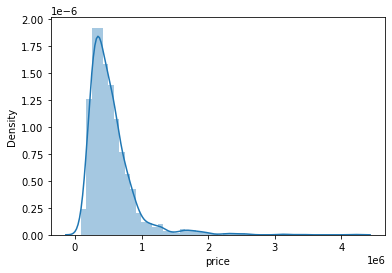

In [8]:
sns.distplot(d['price'])

In [9]:
d['price']=np.log(d['price'])

<AxesSubplot:xlabel='price', ylabel='Density'>

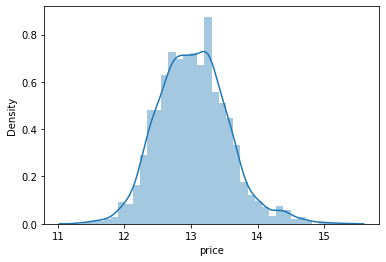

In [10]:
sns.distplot(d['price'])

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

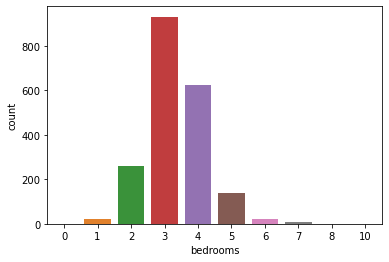

In [11]:
sns.countplot(d['bedrooms'])

In [12]:
d.groupby('waterfront')['price'].sum()

waterfront
0   25938.93
1     139.02
Name: price, dtype: float64

In [13]:
d.groupby('view')['price'].sum()

view
0   23376.65
1     310.22
2    1171.85
3     704.28
4     514.95
Name: price, dtype: float64

In [14]:
d.groupby('condition')['price'].sum().sort_values(ascending=False)

condition
3   15907.52
4    7512.34
5    2330.18
2     266.19
1      61.72
Name: price, dtype: float64

<AxesSubplot:xlabel='waterfront', ylabel='price'>

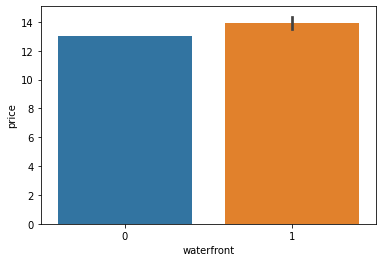

In [15]:
sns.barplot(x='waterfront',y='price',data=d)

<AxesSubplot:xlabel='view', ylabel='price'>

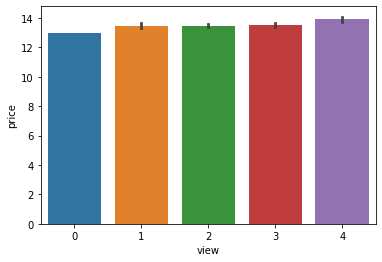

In [16]:
sns.barplot(x='view',y='price',data=d)

<AxesSubplot:xlabel='waterfront', ylabel='count'>

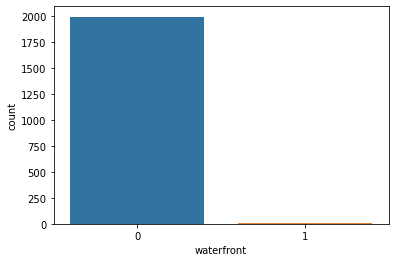

In [17]:
sns.countplot(d['waterfront'])

<AxesSubplot:xlabel='view', ylabel='count'>

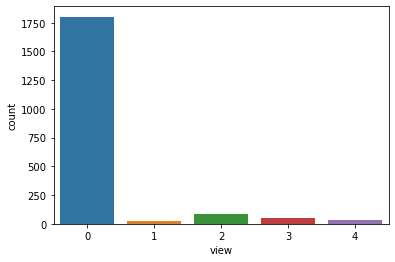

In [18]:
sns.countplot(d['view'])

<AxesSubplot:xlabel='condition', ylabel='count'>

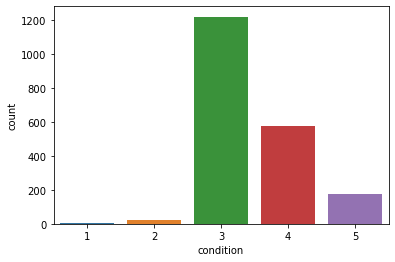

In [19]:
sns.countplot(d['condition'])

In [20]:
x = d.drop(['price','date'], 1)
y= d['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [21]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(x_train, y_train)}')
print(f'R^2 score: {lin_reg.score(x_test, y_test)}')

Coefficients: [-2.93095376e-12 -6.28021221e-03  8.05830958e-02  9.21482618e-05
  8.85847416e-07  8.50165371e-02  3.02087271e-01  7.00829024e-02
  7.54234384e-02  1.58044064e-01  3.81667132e-05  5.39815485e-05
 -3.69750539e-03  5.59907233e-05 -6.72064357e-04  1.45664050e+00
 -1.69390527e-01  1.08602927e-04 -1.34369828e-08]
Intercept: -5.983057635197177
R^2 score: 0.7655975251804507
R^2 score: 0.7281435190879517


In [22]:
y_pred= lin_reg.predict(x_test)
y_pred

array([14.49670863, 13.13306045, 13.07596657, 13.32107575, 12.8747961 ,
       12.86111242, 13.70926266, 12.22306579, 14.4634218 , 12.40139557,
       12.6200787 , 13.90777852, 12.73541458, 13.3649076 , 12.44706244,
       12.526465  , 12.87118741, 12.49435261, 12.91214375, 13.70832495,
       12.97629481, 12.52681298, 12.50195836, 13.0875229 , 12.88975498,
       13.13287286, 13.50026776, 12.90909597, 13.57010105, 12.89857233,
       12.39380639, 12.43233966, 12.69790134, 12.89988128, 12.69236358,
       12.63670967, 13.28675857, 12.35887884, 13.87258144, 13.37407659,
       12.10977334, 13.3719044 , 12.07993127, 13.56041733, 12.60404198,
       13.47649886, 13.37046812, 12.89596268, 12.96544066, 13.07585735,
       12.92246295, 12.9457885 , 12.70353015, 12.43388186, 12.13893062,
       12.49802147, 14.0508424 , 13.04726707, 12.24988004, 12.88096126,
       13.46492533, 12.65203308, 13.83556975, 13.53528905, 13.29261184,
       13.81395519, 12.32654702, 12.92875502, 12.21291157, 12.29

In [23]:
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     340.1
Date:                Mon, 06 Sep 2021   Prob (F-statistic):               0.00
Time:                        21:26:36   Log-Likelihood:                -135.17
No. Observations:                2001   AIC:                             308.3
Df Residuals:                    1982   BIC:                             414.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -10.3458     12.566     -0.823      0.410     -34.989      14.297
id            -1.597e-12   2.06e-12     -0.775      0.438   -5.63e-12    2.44e-12
bedrooms         -0.0030      0.008     -0.358      0.721      -0.019       0.013
bathrooms         0.0855      0.014      5.992      0.000       0.058       0.113
sqft_living    7.052e-05   9.66e-06      7.297      0.000    5.16e-05    8.95e-05
sqft_lot       7.508e-07   2.23e-07      3.366      0.001    3.13e-07    1.19e-06
floors            0.0664      0.017      3.998      0.000       0.034       0.099
waterfront        0.3379      0.087      3.890      0.000       0.168       0.508
view              0.0662      0.008      8.026      0.000       0.050       0.082
condition         0.0721      0.009      7.635      0.000       0.054       0.091
grade             0.1642      0.009     17.559      0.000       0.146       0.183
sqft_above     2.779e-05   1.02e-05      2.729      0.006    7.82e-06    4.78e-05
sqft_basement  4.272e-05   1.12e-05      3.817      0.000    2.08e-05    6.47e-05
yr_built         -0.0036      0.000    -10.790      0.000      -0.004      -0.003
yr_renovated   6.068e-05   1.54e-05      3.930      0.000    3.04e-05     9.1e-05
zipcode          -0.0006      0.000     -4.123      0.000      -0.001      -0.000
lat               1.4122      0.047     30.157      0.000       1.320       1.504
long             -0.1452      0.056     -2.578      0.010      -0.256      -0.035
sqft_living15     0.0001   1.45e-05      8.456      0.000    9.43e-05       0.000
sqft_lot15    -1.147e-07      3e-07     -0.382      0.702   -7.03e-07    4.74e-07
==============================================================================
Omnibus:                      100.844   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              300.331
Skew:                          -0.195   Prob(JB):                     6.08e-66
Kurtosis:                       4.857   Cond. No.                     1.76e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.9e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [24]:
d.corr()['price'].sort_values(ascending=False)

price            1.00
grade            0.69
sqft_living      0.68
sqft_living15    0.63
sqft_above       0.58
bathrooms        0.54
lat              0.43
view             0.35
bedrooms         0.35
sqft_basement    0.32
floors           0.31
waterfront       0.12
yr_renovated     0.11
sqft_lot         0.09
condition        0.08
sqft_lot15       0.08
yr_built         0.07
long             0.06
id              -0.02
zipcode         -0.04
Name: price, dtype: float64

In [25]:
lin_reg1 = Lasso()
lin_reg1.fit(x_train, y_train)

Lasso()

In [26]:
print(f'Coefficients: {lin_reg1.coef_}')
print(f'Intercept: {lin_reg1.intercept_}')
print(f'R^2 score: {lin_reg1.score(x_train, y_train)}')
print(f'R^2 score: {lin_reg1.score(x_test, y_test)}')

Coefficients: [-4.17973383e-12 -0.00000000e+00  0.00000000e+00  2.98915445e-04
  7.36711894e-07  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  9.96239212e-06  0.00000000e+00
 -2.18877626e-03  7.14390274e-05  5.04359082e-04  0.00000000e+00
 -0.00000000e+00  2.39590353e-04 -1.15412563e-06]
Intercept: -33.19864994686334
R^2 score: 0.5290972666865792
R^2 score: 0.5515589295548243


In [27]:
lin_reg2 = Ridge()
lin_reg2.fit(x_train, y_train)
print(f'Coefficients: {lin_reg2.coef_}')
print(f'Intercept: {lin_reg2.intercept_}')
print(f'R^2 score: {lin_reg2.score(x_train, y_train)}')
print(f'R^2 score: {lin_reg2.score(x_test, y_test)}')

Coefficients: [-3.08877801e-12 -7.42641270e-03  8.21920451e-02  9.15965353e-05
  8.67718319e-07  8.56141339e-02  2.66928111e-01  7.01912323e-02
  7.42896326e-02  1.60162629e-01  3.66557798e-05  5.49406879e-05
 -3.81098963e-03  5.51719206e-05 -6.21184369e-04  1.38834920e+00
 -1.53485972e-01  1.10083554e-04 -5.46711129e-08]
Intercept: -5.568192911743957
R^2 score: 0.7653078205344901
R^2 score: 0.7288971906439544


In [28]:
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(x_train, y_train) 


RandomForestRegressor(random_state=0)

In [29]:
print(f'R^2 score: {regressor.score(x_train, y_train)}')
print(f'R^2 score: {regressor.score(x_test, y_test)}')


R^2 score: 0.9733189034161438
R^2 score: 0.8518488375280776


In [30]:
y_pred2=regressor.predict(x_test)

<AxesSubplot:xlabel='price', ylabel='long'>

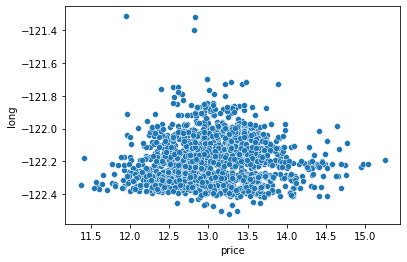

In [31]:
sns.scatterplot(x='price',y='long',data=d)

In [32]:
d1=d.drop('date',axis=1)

In [33]:
z = np.abs(stats.zscore(d1))

In [34]:
data_clean = d1[(z<3).all(axis=1)]


<AxesSubplot:xlabel='price', ylabel='long'>

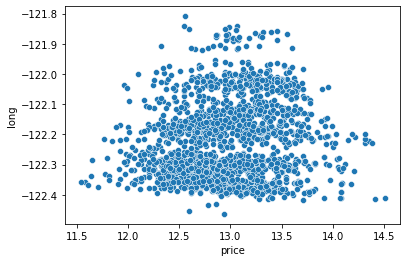

In [35]:
sns.scatterplot(x='price',y='long',data=data_clean)

In [36]:
x1 = data_clean.drop(['price'], 1)
y1= data_clean['price']
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.3,random_state=1)

In [37]:
lin_reg = LinearRegression()
lin_reg.fit(x_train1, y_train1)

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(x_train1, y_train1)}')
print(f'R^2 score: {lin_reg.score(x_test1, y_test1)}')


Coefficients: [-1.13299206e-12  2.84127230e-04  7.71628445e-02  8.90852532e-05
  6.46111698e-07  9.76944156e-02 -1.15879528e-15  9.82272405e-02
  6.32512575e-02  1.52212444e-01  2.92204768e-05  5.98647767e-05
 -4.07578908e-03  2.22044605e-16 -6.82532006e-04  1.48847485e+00
 -5.47504545e-02  1.22149605e-04 -2.16942985e-06]
Intercept: 8.347217186863276
R^2 score: 0.7217404557242327
R^2 score: 0.7150703902647477


In [38]:
X = sm.add_constant(x1)
model = sm.OLS(y1, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     273.2
Date:                Mon, 06 Sep 2021   Prob (F-statistic):               0.00
Time:                        21:26:41   Log-Likelihood:                -28.000
No. Observations:                1704   AIC:                             90.00
Df Residuals:                    1687   BIC:                             182.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.5346     13.122      0.193      0.847     -23.203      28.272
id            -1.914e-12   2.12e-12     -0.904      0.366   -6.07e-12    2.24e-12
bedrooms         -0.0071      0.009     -0.781      0.435      -0.025       0.011
bathrooms         0.0881      0.016      5.665      0.000       0.058       0.119
sqft_living    9.034e-05   1.21e-05      7.477      0.000    6.66e-05       0.000
sqft_lot       6.632e-07   7.07e-07      0.938      0.349   -7.24e-07    2.05e-06
floors            0.0811      0.020      4.117      0.000       0.042       0.120
waterfront    -2.598e-11   1.35e-10     -0.193      0.847    -2.9e-10    2.38e-10
view              0.0809      0.016      5.103      0.000       0.050       0.112
condition         0.0637      0.010      6.445      0.000       0.044       0.083
grade             0.1497      0.010     14.546      0.000       0.129       0.170
sqft_above     3.761e-05   1.26e-05      2.981      0.003    1.29e-05    6.24e-05
sqft_basement  5.274e-05   1.29e-05      4.078      0.000    2.74e-05    7.81e-05
yr_built         -0.0040      0.000    -11.587      0.000      -0.005      -0.003
yr_renovated  -4.857e-15   2.24e-14     -0.217      0.828   -4.88e-14    3.91e-14
zipcode          -0.0005      0.000     -3.616      0.000      -0.001      -0.000
lat               1.4700      0.048     30.705      0.000       1.376       1.564
long              0.0159      0.067      0.236      0.813      -0.116       0.148
sqft_living15     0.0001   1.76e-05      6.681      0.000    8.31e-05       0.000
sqft_lot15    -2.227e-06   8.29e-07     -2.685      0.007   -3.85e-06      -6e-07
==============================================================================
Omnibus:                       24.835   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.625
Skew:                          -0.067   Prob(JB):                     5.55e-10
Kurtosis:                       3.763   Cond. No.                     1.57e+27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.12e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [39]:
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(x_train1, y_train1) 


RandomForestRegressor(random_state=0)

In [40]:
print(f'R^2 score: {regressor.score(x_train1, y_train1)}')
print(f'R^2 score: {regressor.score(x_test1, y_test1)}')


R^2 score: 0.975017594470029
R^2 score: 0.8268143770478584


In [41]:
y_pred1=regressor.predict(x_test1)
y_pred1

array([13.59104738, 12.68611418, 12.73468417, 13.26486509, 13.62840035,
       13.14912703, 13.32425398, 12.50213435, 13.11805332, 12.69834465,
       12.67841486, 12.94634654, 13.03125139, 13.383272  , 13.09358984,
       12.88728788, 12.90694043, 13.41232207, 12.4106151 , 12.3740368 ,
       13.33336417, 12.61807564, 13.05355161, 12.87029934, 12.72380875,
       12.5528526 , 12.38516576, 13.65178979, 12.88642625, 12.6886977 ,
       12.80056107, 12.37597965, 12.99358702, 12.75041144, 13.18389762,
       12.72235143, 13.29746684, 13.36470645, 13.16067413, 13.98588038,
       12.90553696, 13.2876773 , 13.29887715, 12.89476122, 11.93186766,
       13.59759513, 12.46705433, 12.71044444, 13.18071816, 12.54967679,
       12.94468171, 11.99295265, 12.6229187 , 12.57820856, 12.46090755,
       12.88141424, 13.56239695, 12.85334229, 13.35539821, 13.27309047,
       12.84794821, 12.46557206, 13.0740972 , 12.46072229, 13.31252203,
       12.95221759, 13.53636502, 12.72680966, 12.43550471, 12.94

In [42]:
sqrt(mean_squared_error(y_test, y_pred))

0.28677136470988307

In [43]:
sqrt(mean_squared_error(y_test1, y_pred1))

0.18307918047356547

In [44]:
sqrt(mean_squared_error(y_test, y_pred2))

0.2116988356768064

In [47]:
# Lower RMSE acheived is 0.18307